# Imports

In [1]:
#@title General
import numpy as np
import pandas as pd
import random as r
import itertools
import math
import matplotlib.pyplot as plt
import copy
import math
from difflib import SequenceMatcher
import time
import json

# Parameters

Em geral, todos parâmetros para mudar o tuning do programa então aqui. (E na função Score)

In [6]:
#@title Gerais
# parametros de busca
insideloop = 10 # number of modification in each iteration of the stocastic search
outsideloop = 1000 # number of steps in the search

In [11]:
# import data for participants
df_stds = pd.read_csv('/content/drive/Shareddrives/Organização SIFSC/SIFSC 13/Sistemas e Avaliação/Avaliações/Atribuição Avaliador Avaliado/Testes/abstracts.csv', sep=',')
# view data
df_stds.head()

,Id,Title,Palavras-chave,Orientador e coorientador,Subárea 1,Subárea 2,Subárea 3,Subárea 4,Modalidade,State,...,Primary authors (affiliation),Primary authors (email),Co-Authors,Co-Authors (affiliation),Co-Authors (email),Accepted track,Submitted for tracks,Reviewed for tracks,Accepted type,Submitted type
0,90,Nanossistemas biomiméticos contendo Paclitaxel...,Nanopartículas biomiméticas. Paclitaxel. Neuro...,Valtencir Zucolotto. Valéria Maria de Oliveira...,Física da Matéria Condensada,Física Aplicada à Biologia e à Medicina,NaN,NaN,MESTRADO,Aceito,...,Yara Gabriele Botassio (Instituto de Física d...,Yara Gabriele Botassio <yara.botassio@usp.br>,Valéria Maria de Oliveira Cardoso; Valtencir Z...,Valéria Maria de Oliveira Cardoso (Instituto d...,Valéria Maria de Oliveira Cardoso <vmo.cardoso...,NaN,CIÊNCIAS FÍSICAS E BIOMOLECULARES,CIÊNCIAS FÍSICAS E BIOMOLECULARES,Normal,Normal
1,39,A Computational Approach for Image-Based Monit...,Depth Estimation. Image Processing. Lesion Mon...,Lilian Tan Moriyana,Física Computacional,Óptica,Biotecnologia,NaN,MESTRADO,Aceito,...,Otávio Palamoni (Instituto de Física de São Ca...,Otávio Palamoni <palamoni@ifsc.usp.br>,Lilian Tan Moriyama,Lilian Tan Moriyama (Instituto de Física de Sã...,Lilian Tan Moriyama <lili@ifsc.usp.br>,NaN,FÍSICA COMPUTACIONAL,FÍSICA COMPUTACIONAL,Normal,Normal
2,92,Tomografia de Coerência Ótica (OCT): scanner p...,Optical-coherence-tomography. Impressão-digita...,Orientador Jarbas C. de Castro N.. Coorientado...,Óptica,Física Aplicada à Biologia e à Medicina,NaN,NaN,MESTRADO,Aceito,...,Mario Trama Buozzi (Instituto de Física de São...,Mario Trama Buozzi <mariobuozzi2332@usp.br>,Jarbas Caiado de Castro Neto; Fatima Maria Mit...,Jarbas Caiado de Castro Neto (Instituto de Fís...,Jarbas Caiado de Castro Neto <jarbas@ifsc.usp....,NaN,FÍSICA TEÓRICA E EXPERIMENTAL,FÍSICA TEÓRICA E EXPERIMENTAL,Normal,Normal
3,98,Desenvolvimento e validação de biossensores po...,Biossensor. Imunossensor. Dengue.,Débora Gonçalves,Física Aplicada à Biologia e à Medicina,Biotecnologia,NaN,NaN,DOUTORADO,Aceito,...,Maria Angélica de Camargo (Instituto de Física...,Maria Angélica de Camargo <maria_angelica@usp.br>,Debora Gonçalves,Debora Gonçalves (Instituto de Física de São C...,Debora Gonçalves <deborag0405@gmail.com>,NaN,CIÊNCIAS FÍSICAS E BIOMOLECULARES,CIÊNCIAS FÍSICAS E BIOMOLECULARES,Normal,Normal
4,37,A quantum model for seizures,Seizures. Spin-boson model. Superradiance.,Miled Hassan Youssef Moussa,Física Aplicada à Biologia e à Medicina,Biofísica,NaN,NaN,DOUTORADO,Aceito,...,Hugo Sanchez de Araujo (Instituto de Física de...,Hugo Sanchez de Araujo <hugo.sanchezdearaujo@g...,Miled Hassan Youssef Moussa,Miled Hassan Youssef Moussa (Instituto de Físi...,Miled Hassan Youssef Moussa <miled@ifsc.usp.br>,NaN,FÍSICA TEÓRICA E EXPERIMENTAL,FÍSICA TEÓRICA E EXPERIMENTAL,Normal,Normal


In [12]:
# import data for referees
df_refs = pd.read_csv('/content/drive/Shareddrives/Organização SIFSC/SIFSC 13/Sistemas e Avaliação/Avaliações/Atribuição Avaliador Avaliado/Testes/registrations.csv', sep=',')
# view data
df_refs.head()

,ID,Name,Nome,Email,Ocupação,Affiliation,Position,Title,Orienta algum aluno de pós-graduação do IFSC/USP?,Irá contribuir como avaliador na SIFSC 13?,Seus horários de INDISPONIBILIDADE no dia 21/08 (segunda-feira),Áreas de competência,Sugira outras subáreas de sua especialidade,Registration date,Registration state,Tags
0,96,Camila Aparecida Antunes,Camila,camila.antunes@ifsc.usp.br,Doutorando,NaN,NaN,NaN,Não,Sim,NaN,Física Aplicada à Biologia e à Medicina,Acústica,2023-07-04 20:26:48.965998+00:00,Completed,NaN
1,202,Esmerindo Bernardes,Esmerindo,sousa@ifsc.usp.br,Docente do IFSC/USP,NaN,NaN,NaN,Sim,Sim,NaN,Física da Matéria Condensada; Física de Partíc...,NaN,2023-07-11 20:59:17.697139+00:00,Completed,NaN
2,107,Diogo Boito,Diogo,boito@ifsc.usp.br,Docente do IFSC/USP,NaN,NaN,NaN,Sim,Sim,09h00 - 10h30,Astrofísica e Astronomia; Física de Partículas...,NaN,2023-07-05 16:12:10.459714+00:00,Completed,NaN
3,61,Raphael Antonio Caface,Raphael Antonio,rcaface@usp.br,Pós-Doc,NaN,NaN,NaN,Não,Sim,NaN,Biofísica; Bioquímica; Biotecnologia; Física A...,NaN,2023-07-03 14:56:12.485832+00:00,Completed,NaN
4,85,Italo Augusto Cavini,Italo Augusto,italo.cavini@usp.br,Pós-Doc,NaN,NaN,NaN,Não,Sim,NaN,Biofísica; Bioquímica; Biotecnologia; Cristalo...,NaN,2023-07-04 11:38:55.063813+00:00,Completed,NaN


# Classes

Algumas classes que serão úteis para manter a ordem durante o seguimento do código. Referee e Student são extensões de Participant.

In [13]:
#@title Participant

class Participant:
    identity = itertools.count()
    def __init__(self, name, words):
        self.name = name # name of participant
        self.words = words # vectors of 1's and 0's for existing or non existing word
        self.id = next(self.identity) # id of this participant
        self.LatentRepr = None # latent representation in space of projection of SVD
        self.allocated = [] # wich were allocated (both students or referees)
        self.section = [] # section of student

    def __str__(self):
        return self.name # get name

    def __eq__(self, other):
        return self.id == other.id # compare two participants

    # Latent Represatation
    def setLatentRepr(self, LatentRepr):
        if type(LatentRepr) == np.ndarray:
            self.LatentRepr = LatentRepr / np.linalg.norm(LatentRepr)
        else:
            raise ValueError('Latent representation must be a numpy array')

    # Relation between two vectors of latent repr
    def relation(self, other):
        if self.LatentRepr is not None and other.LatentRepr is not None:
            # return normalized angle between vectors
            return np.dot(self.LatentRepr, other.LatentRepr)
        else:
            raise ValueError('Latent representation not set')

In [14]:
#@title Referee
#@title Referee
class Referee(Participant):

    def __init__(self, name, words, typeRef, maxStd):
        super().__init__(name, words)
        self.type = typeRef # type of referee
        self.supervisedStds = [] # wich students are supervised
        self.maxStudents = maxStd

    # add a Student as supervised
    def addSupervisedStd(self, std):
        if isinstance(std, Student):
            if std not in self.supervisedStds:
                self.supervisedStds.append(std)
            else:
                raise ValueError('Student already in the list')
        else:
            raise ValueError('Supervised student must be a student')

    # get type of referee
    def gettypeRef(self):
        if self.type == 0:
            return 'Professor'
        elif self.type == 1:
            return 'Researcher'
        elif self.type == 2:
            return 'PhD-Student'
        else:
            raise ValueError('Unknown type of referee')

    def __str__(self):
        return 'Referee ' + super().__str__() + ' - ' + self.gettypeRef()

    def addSection(self, secNumber, std):
        if isinstance(std, Student):
            self.section.append([secNumber, std])
        else:
            raise ValueError('Student not a Student')

In [15]:
#@title Student
class Student(Participant):

    def __init__(self, name, words, typeStd, Ctype, Authors):
        super().__init__(name, words)
        self.type = typeStd # type of Student
        self.Ctype = Ctype # type of contribution
        self.supervisers = [] # wich superviders
        self.Authors = Authors # authors of the paper

    # add superviser to student
    def addSuperviser(self, superviser):
        if isinstance(superviser, Referee):
            if superviser not in self.supervisers:
                self.supervisers.append(superviser)
            else:
                raise ValueError('Superviser already in the list')
        else:
            raise ValueError('Superviser must be a referee')

    # get type of student
    def gettypeStd(self):
        if self.type == 0:
            return 'PhD-Student'
        elif self.type == 1:
            return 'Master-Student'
        elif self.type == 2:
            return 'Undergraduate-Student/Other'
        else:
            raise ValueError('Unknown type of student')

    # allocate ref to std
    def allocate(self, ref):
        if isinstance(ref, Referee):
            if ref not in self.allocated:
                self.allocated.append(ref)
                ref.allocated.append(self)
            else:
                raise ValueError('Student already allocated')
        else:
            raise ValueError('Allocated student must be a Referee')

    # deallocate ref of std
    def deallocate(self, ref):
        if isinstance(ref, Referee):
            if ref in self.allocated:
                if self in ref.allocated:
                    self.allocated.remove(ref)
                    ref.allocated.remove(self)
                else:
                    raise ValueError('Student not even allocated in the referee')
            else:
                raise ValueError('Teacher not even allocated in the student')
        else:
            raise ValueError('Allocated student must be a Referee')

    def __str__(self):
        return 'Student ' + super().__str__() + ' - ' + self.gettypeStd()

    def addSection(self, secNumber, ref):
        if isinstance(ref, Referee):
            self.section.append(secNumber)
            ref.addSection(secNumber, self)
        else:
            raise ValueError('Referee not a Referee')

    def isAuthor(self, author):
        if isinstance(author, Referee):
            if author.name in self.Authors:
                return True
            else:
                return False
        else:
            raise ValueError('Author not a Referee')

# Data

In [31]:
# for every line in the data frame create a participant
def createParticipants(df, typeP, words):
    participants = []
    for index, row in df.iterrows():

        if typeP == 'std':

            # students are init with name, words, type of student, type of contribution and authors
            # name
            name = row['Submitter'].upper()

            # words
            sa = [row['Subárea 1'], row['Subárea 2'], row['Subárea 3'], row['Subárea 4']]
            sa = [w.upper().strip() for w in sa if w is not np.nan]
            w = [1 if w in sa else 0 for w in words]

            # type of student
            if row['Modalidade'] == 'DOUTORADO':
                typeStd = 0
            elif row['Modalidade'] == 'MESTRADO':
                typeStd = 1
            elif row['Modalidade'] == 'INICIAÇÃO':
                typeStd = 2
            elif row['Modalidade'] == 'OUTRO':
                typeStd = 2
            else:
                raise ValueError('Unknown type of student')

            # type of contribution
            if row["Submitted type"] == 'Básica':
                c_type = 0
            elif row["Submitted type"] == 'Normal':
                c_type = 1
            elif row["Submitted type"] == 'Prêmio YPM':
                c_type = 2
            else:
                raise ValueError('Unknown type of contribution')

            # authors
            authors = row['Primary authors'].split(';')
            coAuthors = row['Co-Authors'].split(';') if row['Co-Authors'] is not np.nan else []
            authors = [author.upper().strip() for author in authors]
            coAuthors = [author.upper().strip() for author in coAuthors]
            authors.extend(coAuthors)

            participants.append(Student(name, w, typeStd, c_type, authors))

        elif typeP == 'ref':

            # referees are init with name, words, type of referee and max number of students
            # name
            name = row['Name'].upper()

            # words
            sa = row['Áreas de competência'].split(';')
            sa = [w.upper().strip() for w in sa if w is not np.nan]
            w = [1 if w in sa else 0 for w in words]

            # type of referee
            if row['Ocupação'] == 'Docente do IFSC/USP':
                typeRef = 0
            elif row['Ocupação'] == 'Pós-Doc' or row['Ocupação'] == 'Técnico com Doutorado':
                typeRef = 1
            elif row['Ocupação'] == 'Doutorando':
                typeRef = 2
            else:
                raise ValueError('Unknown type of referee')

            # max number of students
            maxstds = 10

            participants.append(Referee(name, w, typeRef, maxstds))

        else:
            raise ValueError('Unknown type of participant')

    return participants

# create list of unique words
def createUniqueWords():
    uniqueWords = []

    for index, row in df_stds.iterrows():
        words = [row['Subárea 1'], row['Subárea 2'], row['Subárea 3'], row['Subárea 4']]
        for word in words:
            if type(word) == str:
                app = word.upper().strip()
                if app not in uniqueWords:
                    uniqueWords.append(app)

    for index, row in df_refs.iterrows():
        words = row['Áreas de competência'].split(';')
        for word in words:
            if type(word) == str:
                app = word.upper().strip()
                if app not in uniqueWords:
                    uniqueWords.append(app)

    return uniqueWords

words = createUniqueWords()

# create list of students
Stds = createParticipants(df_stds, 'std', words)

# create list of referees
Refs = createParticipants(df_refs, 'ref', words)

# make sure students and refs are unique by name
for std1 in Stds:
    for std2 in Stds:
        if std1 != std2:
            if std1.name == std2.name:
                Stds.remove(std2)

for ref1 in Refs:
    for ref2 in Refs:
        if ref1 != ref2:
            if ref1.name == ref2.name:
                Refs.remove(ref2)

# check if authors have same name as referees but slightly different
dict_authors = {}
# make list of unique author names
unique_authors = []
for std in Stds:
    for author in std.Authors:
        if author not in unique_authors:
            unique_authors.append(author)

# for every auhtor check if it is similar to a referee
for author in unique_authors:
    similarity = [SequenceMatcher(None, author, ref.name).ratio() for ref in Refs]

    for sim in similarity:
        if sim > .6 and sim < 1:
            print(f'Is {author} the same as {Refs[np.argmax(similarity)].name}? y/n')
            r = input()
            # wait a second
            if r == 'y':
                print(f"Ok, {author} is the same as {Refs[np.argmax(similarity)].name}")
                # add alternative name for author in dictinary
                dict_authors[author] = Refs[np.argmax(similarity)].name

# save dict_authors
with open('dict_authors.json', 'w') as fp:
    json.dump(dict_authors, fp)

# replace author names in Stds
for std in Stds:
    for i in range(len(std.Authors)):
        if std.Authors[i] in dict_authors.keys():
            std.Authors[i] = dict_authors[std.Authors[i]]

# parametros gerais
nStd = len(Stds) # number of Student
nRef = len(Refs) # number of Teacher
nWrd = len(words) # number of words

Is LUIZ NUNES DE OLIVEIRA the same as CAINÃ OLIVEIRA? y/n
n
Is DIOGO SOARES PINTO the same as DIOGO BOITO? y/n
n
Is EMANUEL ALVES DE LIMA HENN the same as EMANUEL HENN? y/n
y
Ok, EMANUEL ALVES DE LIMA HENN is the same as EMANUEL HENN
Is ÍTALO AUGUSTO CAVINI the same as ITALO AUGUSTO CAVINI? y/n
y
Ok, ÍTALO AUGUSTO CAVINI is the same as ITALO AUGUSTO CAVINI
Is IGOR REIS the same as IGOR MOURA? y/n
n
Is EMMANUEL MOULIN the same as EMANUEL HENN? y/n
n
Is NATALIA MAYUMI INADA the same as NATALIA INADA? y/n
y
Ok, NATALIA MAYUMI INADA is the same as NATALIA INADA
Is AGIDE MARASSI the same as AGIDE GIMENEZ MARASSI? y/n
y
Ok, AGIDE MARASSI is the same as AGIDE GIMENEZ MARASSI
Is RAFAEL MARQUES DA SILVA the same as ADONAI HILARIO DA SILVA? y/n
n
Is CAMILA APARECIDA APARECIDA the same as CAMILA APARECIDA ANTUNES? y/n
y
Ok, CAMILA APARECIDA APARECIDA is the same as CAMILA APARECIDA ANTUNES
Is NATÁLIA MENEZES MOREIRA BORGES the same as NATALIA SANCHEZ MORENO? y/n
n
Is LUISA CARDOSO MAIA the same a

In [35]:
# read json in dict_authors
with open('/content/drive/Shareddrives/Organização SIFSC/SIFSC 13/Sistemas e Avaliação/Avaliações/Atribuição Avaliador Avaliado/Testes/dict_authors.json', 'r') as fp:
    dict_authors = json.load(fp)

# make dict with dict_authors
dict_authors = {k.upper(): v.upper() for k, v in dict_authors.items()}

print(dict_authors)


{'EMANUEL ALVES DE LIMA HENN': 'EMANUEL HENN', 'ÍTALO AUGUSTO CAVINI': 'ITALO AUGUSTO CAVINI', 'NATALIA MAYUMI INADA': 'NATALIA INADA', 'AGIDE MARASSI': 'AGIDE GIMENEZ MARASSI', 'CAMILA APARECIDA APARECIDA': 'CAMILA APARECIDA ANTUNES', 'JOSÉ FERNANDO FONTANARI': 'JOSE FONTANARI', 'CAINÃ DE OLIVEIRA': 'CAINÃ OLIVEIRA', 'DIOGO RODRIGUES BOITO': 'DIOGO BOITO', 'ESMERINDO DE SOUSA BERNARDES': 'ESMERINDO BERNARDES', 'PATRÍCIA CHRISTINA MARQUES CASTILHO': 'PATRICIA CHRISTINA MARQUES CASTILHO', 'SÉRGIO RICARDO MUNIZ': 'SERGIO MUNIZ', 'SERGIO RICARDO MUNIZ': 'SERGIO MUNIZ', 'FABIO FRANCISCO PINTO JUNIOR': 'FABIO PINTO JR', 'NATÁLIA MAYUMI INADA': 'NATALIA INADA', 'JOSE FERNANDO FONTANARI': 'JOSE FONTANARI', 'GREGÓRIO FARIA': 'GREGÓRIO COUTO FARIA'}


# SVD

In [ ]:
#@title Run SVD
reductedDim = 5 # reducted dimension of SVD (< 100)

# We need a matrix of Students words and a matrix of teachers words
stdsMatrix = np.array([Stds[i].words for i in range(nStd)]).T
RefsMatrix = np.array([Refs[i].words for i in range(nRef)]).T

# SVD decomposition of the students in reducted dimension
Uo, So, Vo = np.linalg.svd(stdsMatrix)
Uo = Uo[:, :reductedDim]
So = So[:reductedDim]
Vo = Vo[:reductedDim, :]

In [ ]:
#@title Latent Representation
# Project the teachers into the space U
RefsProj = np.dot(Uo.T, RefsMatrix)
StdsProj = np.dot(Uo.T, stdsMatrix)

# Set latent representation in U for Stds
RefsProj = RefsProj.T
StdsProj = StdsProj.T

# set latent representation in U for Stds
cont = 0
for std in Stds:
    std.setLatentRepr(StdsProj[cont])
    cont += 1
# set latent representation in U for Refs
cont = 0
for ref in Refs:
    ref.setLatentRepr(RefsProj[cont])
    cont += 1

# Correlation


In [ ]:
#@title Calculate Correlation Matrix

# Calculate the correlation matrix with the angle using LatentRepr
Corr = [[Refs[i].relation(Stds[j]) for i in range(nRef)] for j in range(nStd)]

In [ ]:
#@title Save File
# write in file the correlation matrix
df = pd.DataFrame(Corr)
# put the index and header
df.index = [str(Stds[i]) for i in range(nStd)]
df.columns = [str(Refs[i]) for i in range(nRef)]
# write in file
df.to_csv('Corr.csv', index=True, header=True)

# download the file

# Allocate

In [ ]:
#@title Impose Rules

RulesMatrix = np.array([[True for _ in range(nRef)] for _ in range(nStd)])

# # create random relations between students and teachers
# for i in range(nRel):
#     istd = r.randint(0, nStd-1)
#     itch = r.randint(0, nTch-1)
#     if len(Stds[istd].supervisers) < 1:
#         Stds[istd].addSuperviser(Tchs[itch])
#         Tchs[itch].addSupervisedStd(Stds[istd])
#     else:
#         continue

# try and find students authors in referees
for std in Stds:
    for ref in Refs:
        if std.isAuthor(ref):
            std.addSuperviser(ref)
            ref.addSupervisedStd(std)

# add student and his supervisors
for std in Stds:
    for ref in std.supervisers:
        RulesMatrix[Stds.index(std)][Refs.index(ref)] = False

# referees of type 2 can't avaliate students of type 0 or 1
for ref in Refs:
    if ref.type == 2:
        for std in Stds:
            if std.type == 0 or std.type == 1:
                RulesMatrix[Stds.index(std)][Refs.index(ref)] = False

Is CAINÃ OLIVEIRA the same as LUIZ NUNES DE OLIVEIRA? y/n
Is DIOGO BOITO the same as DIOGO SOARES PINTO? y/n
Is EMANUEL HENN the same as EMANUEL ALVES DE LIMA HENN? y/n
Is ITALO AUGUSTO CAVINI the same as ÍTALO AUGUSTO CAVINI? y/n
Is EMANUEL HENN the same as EMMANUEL MOULIN? y/n
Is IGOR MOURA the same as IGOR REIS? y/n
Is ADONAI HILARIO DA SILVA the same as BIANCA RIGHETTI DA SILVA? y/n
Is NATALIA INADA the same as NATALIA MAYUMI INADA? y/n
Is AGIDE GIMENEZ MARASSI the same as AGIDE MARASSI? y/n
Is ADONAI HILARIO DA SILVA the same as RAFAEL MARQUES DA SILVA? y/n
Is CAMILA APARECIDA ANTUNES the same as CAMILA APARECIDA APARECIDA? y/n
Is JOSE FONTANARI the same as CARLOS ALBERTO MONTANARI? y/n
Is NATALIA SANCHEZ MORENO the same as NATÁLIA MENEZES MOREIRA BORGES? y/n
Is LUCAS MADEIRA the same as LUISA CARDOSO MAIA? y/n
Is ADONAI HILARIO DA SILVA the same as CECILIA CAROLINA PINHEIRO DA SILVA? y/n
Is LUCAS MADEIRA the same as LUCAS CORREIA RIBAS? y/n
Is CAINÃ OLIVEIRA the same as LUIZ NUNE

In [ ]:
#@title Save File

#write ALlocMatrix in file
df = pd.DataFrame(RulesMatrix)
# put the index and header
df.index = [str(Stds[i]) for i in range(nStd)]
df.columns = [str(Refs[i]) for i in range(nRef)]
# write in file
df.to_csv('RulesMatrix.csv', index=True, header=True)

In [ ]:
#@title General Allocation
# we need to create a matrix of allocation with the following rules:
# 1. Each student must have quant_av_std referees (each line must have quant_av_std 1's)
# 2. Each teacher must have the between quant_av_tch and quant_av_tch+1 students (each column must have between quant_av_tch and quant_av_tch+1 1's)
# 3. The rulesMatrix must be respected (each 0 in the rulesMatrix must be 0 in the allocation matrix)

# create the matrix of allocation
AllocMatrix = np.array([[0 for _ in range(nTch)] for _ in range(nStd)])

ref_allocated = [0 for _ in range(nTch)]
std_allocated = [0 for _ in range(nStd)]

# allocate referees of type 0 and 1 to the students of type 0 and 1
for i in range(nStd):
    if Stds[i].type == 0 or Stds[i].type == 1:
        # get all that can be allocated
        tofill = [j for j in range(nTch) if ref_allocated[j] < Tchs[j].maxStudents]
        # get all with type 0 or 1
        typeId = [j for j in range(nTch) if Tchs[j].type == 0 or Tchs[j].type == 1]
        # based on all above + rules
        tchsIdx = [j for j in range(nTch) if RulesMatrix[i][j] and j in tofill and j in typeId]
        # if there is no one to allocate, keep going but skip this student
        if len(tchsIdx) < quant_av_std:
            print('Warning: not enough referees for student ' + str(i) + ' of type ' + str(Stds[i].type) + ' to allocate')
            continue
        # select randomly
        tchsIdx.sort(key=lambda x: ref_allocated[x])
        tchsIdx = tchsIdx[:quant_av_std]
        # allocate
        for j in tchsIdx:
            AllocMatrix[i][j] = 1
            ref_allocated[j] += 1
            std_allocated[i] += 1

# allocate the rest
for i in range(nStd):
    if std_allocated[i] < quant_av_std:
        howmany = quant_av_std - std_allocated[i]
        # get all that can be allocated
        tofill = [j for j in range(nTch) if ref_allocated[j] < Tchs[j].maxStudents]
        # based on all above + rules
        tchsIdx = [j for j in range(nTch) if RulesMatrix[i][j] and j in tofill]
        # if there is no one to allocate, break
        if len(tchsIdx) < howmany:
            print('Error: Really not enough referees for student ' + str(i) + ' of type ' + str(Stds[i].type) + ' to allocate')
            continue
        # select randomly
        tchsIdx.sort(key=lambda x: ref_allocated[x])
        tchsIdx = tchsIdx[:howmany]
        # allocate
        for j in tchsIdx:
            AllocMatrix[i][j] = 1
            ref_allocated[j] += 1
            std_allocated[i] += 1

In [ ]:
#@title Save File
#write ALlocMatrix in file
df = pd.DataFrame(AllocMatrix)
# put the index and header
df.index = [str(Stds[i]) for i in range(nStd)]
df.columns = [str(Tchs[i]) for i in range(nTch)]
# write in file
df.to_csv('AllocMatrix.csv', index=True, header=True)

files.download('AllocMatrix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Matching


A função de Score avalia a qualidade de uma iteração sobre a matriz de alocação. Da presente forma ela toma o vetor soma das linhas da (matriz de correlação * matriz de seleção). Ou seja, somente das celulas da matiz de correlação que foram selecionadas como 1 na atribuição.

Com este vetor, queremos homogeinizar as linhas, logo usamos a variancia dos termos deste vetor como um ponto que aumenta o score (quanto menor, melhor). O outro paramêtro é a dissociação desse vetor à um vetor 'ideal' que cada entrada seria a soma da correlação em cada uma das n avaliações feitas. Essa distancia é melhor quando grande (mesma direção).

alpha e beta são parametros para dizer o quanto nos importamos com cada um dos critérios.


In [ ]:
#@title Function Score
def scoreMatrix(vec):
    # parameter of the score
    alpha = 3
    beta = 5
    idealVector = np.array([3 for _ in range(nStd)]) / np.linalg.norm(np.array([3 for _ in range(nStd)]))

    # calcute the variance of the score
    var = np.var(vec)

    # normalize the vector
    vec = vec / np.linalg.norm(vec)
    # calculate the dot product with the vector of 3's
    dot = np.dot(vec, idealVector)

    # calculate the score
    score = alpha*var - beta*dot

    return score, var, dot

In [ ]:
#@title Run Random Iterations
vectorSoma = [sum([Corr[s][t] * AllocMatrix[s][t] for t in range(nTch)]) for s in range(nStd)]
score, var, dot = scoreMatrix(vectorSoma)
SellectedMatrixBest = copy.deepcopy(AllocMatrix)

#plot score
scorePlot = [score]
#plot variance
varPlot = [var]
#plot dot
dotPlot = [dot]

for loop in range(outsideloop):
    # copy the matrix
    SellectedMatrix = copy.deepcopy(SellectedMatrixBest)

    for _ in range(insideloop):
        # select a random referee
        selected_ref = r.randint(0, nTch-1)

        # select between the students that he has, the least compatible corr
        Least_std = min([Corr[s][selected_ref] for s in range(nStd) if SellectedMatrix[s][selected_ref] == 1], default=-10)
        if Least_std == -10:
          continue
        # index of the least compatible students
        idx = [s for s in range(nStd) if (Corr[s][selected_ref] == Least_std and SellectedMatrix[s][selected_ref] == 1)]
        # select first compatible students
        selected_std = idx[0]

        # for this student, select the most compatible referee
        Most_tch = max([Corr[selected_std][t] for t in range(nTch) if (SellectedMatrix[selected_std][t] == 0 and RulesMatrix[selected_std][t])], default=-10)
        if Most_tch == -10:
          continue
        # index of the most compatible referees
        idx = [t for t in range(nTch) if (Corr[selected_std][t] == Most_tch and SellectedMatrix[selected_std][t] == 0 and RulesMatrix[selected_std][t])]
        # select randomly one of the most compatible referees
        swap_ref = idx[0]

        # from this referee, select the least compatible student that is not allocated to selected_ref
        Least_std = min([Corr[s][swap_ref] for s in range(nStd) if (SellectedMatrix[s][swap_ref] == 1 and SellectedMatrix[s][selected_ref] == 0 and RulesMatrix[s][selected_ref])], default=-10)
        if Least_std == -10:
          continue
        # index of the least compatible students
        idx = [s for s in range(nStd) if (Corr[s][swap_ref] == Least_std and SellectedMatrix[s][swap_ref] == 1 and SellectedMatrix[s][selected_ref] == 0 and RulesMatrix[s][selected_ref])]
        # select randomly one of the least compatible students
        swap_std = idx[0]

        # swap the allocation
        SellectedMatrix[selected_std][selected_ref] = 0
        SellectedMatrix[selected_std][swap_ref] = 1
        SellectedMatrix[swap_std][swap_ref] = 0
        SellectedMatrix[swap_std][selected_ref] = 1

    # # remove the least compatible student from the referee selected
    # Stds[selected_std].deallocate(Tchs[selected_ref])
    # # remove the least compatible student from the other referee
    # Stds[swap_std].deallocate(Tchs[swap_ref])
    # # allocate the most compatible student to the referee selected
    # Stds[selected_std].allocate(Tchs[swap_ref])
    # # allocate the least compatible student to the other referee
    # Stds[swap_std].allocate(Tchs[selected_ref])

    vectorSoma = [sum([Corr[s][t] * SellectedMatrix[s][t] for t in range(nTch)]) for s in range(nStd)]
    score_new, var, dot = scoreMatrix(vectorSoma)

    print(loop, score, score_new)

    # if the score is better, keep the new matrix
    if score_new < score:
        score = score_new
        SellectedMatrixBest = copy.deepcopy(SellectedMatrix)
        #plot score
        scorePlot.append(score)
        #plot variance
        varPlot.append(var)
        #plot dot product
        dotPlot.append(dot)

0 -1.6920280255348015 -1.8251117375443942
1 -1.8251117375443942 -1.9080681500067973
2 -1.9080681500067973 -2.02658173349925
3 -2.02658173349925 -2.07663220078633
4 -2.07663220078633 -2.155488165055826
5 -2.155488165055826 -2.226190721343488
6 -2.226190721343488 -2.2872965062376034
7 -2.2872965062376034 -2.3930353122496593
8 -2.3930353122496593 -2.4637870597696407
9 -2.4637870597696407 -2.4953533715987173
10 -2.4953533715987173 -2.5118402853056665
11 -2.5118402853056665 -2.5172993607498744
12 -2.5172993607498744 -2.6319299242029177
13 -2.6319299242029177 -2.5751482374048367
14 -2.6319299242029177 -2.6147433955410553
15 -2.6319299242029177 -2.5952007156307193
16 -2.6319299242029177 -2.626653178271983
17 -2.6319299242029177 -2.658613708408977
18 -2.658613708408977 -2.718974993234541
19 -2.718974993234541 -2.7313553196792255
20 -2.7313553196792255 -2.7466765990633526
21 -2.7466765990633526 -2.821870673003002
22 -2.821870673003002 -2.8403522229516116
23 -2.8403522229516116 -2.90267468328120

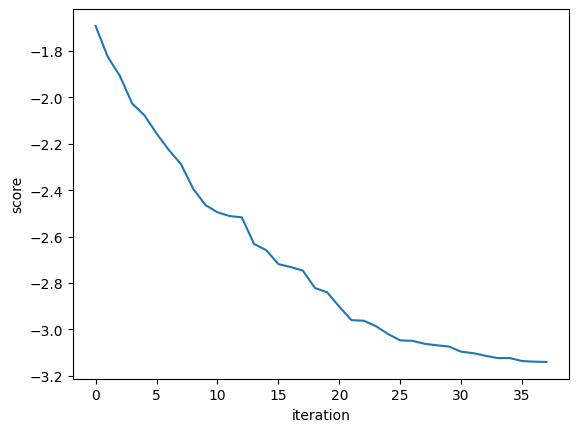

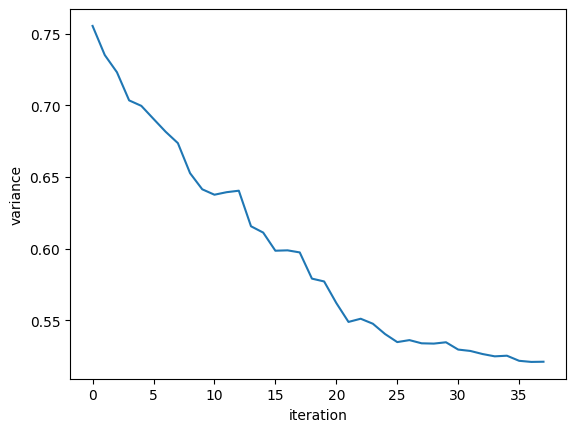

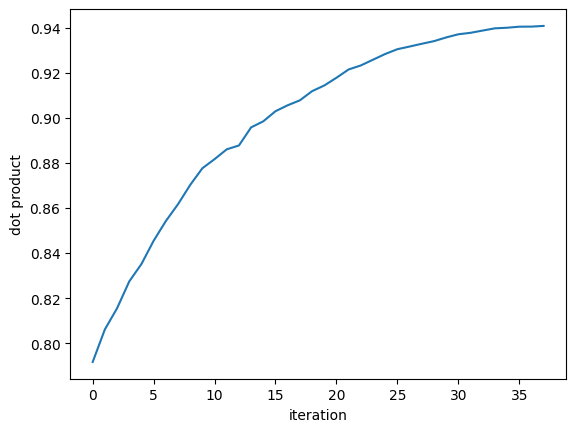

In [ ]:
#@title save and plot

# write score in file
df = pd.DataFrame([scorePlot, varPlot, dotPlot])
# put the index and header
df.index = ['score', 'variance', 'dot product']
df.columns = [str(i) for i in range(len(scorePlot))]
# write in file
df.to_csv('score.csv', index=True, header=True)

#plot score
plt.plot(scorePlot)
plt.ylabel('score')
plt.xlabel('iteration')
plt.show()

#plot variance
plt.plot(varPlot)
plt.ylabel('variance')
plt.xlabel('iteration')
plt.show()

#plot dot product
plt.plot(dotPlot)
plt.ylabel('dot product')
plt.xlabel('iteration')
plt.show()

In [ ]:
#@title Save File

# write matrix of allocation in file
df = pd.DataFrame(SellectedMatrixBest)
# put the index and header
df.index = [str(Stds[i]) for i in range(nStd)]
df.columns = [str(Tchs[i]) for i in range(nTch)]
# write in file
df.to_csv('SellectedMatrixBest.csv', index=True, header=True)

files.download('SellectedMatrixBest.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Time allocation

In [ ]:
#@title Parametros
sectionsTime = [1, 2, 3, 4]
Timeoutsideloop = 50000
Timeinsideloop = 1
nSections = len(sectionsTime)
nStdsPerSection = math.ceil(nStd / nSections)

In [ ]:
#@title Func to calculate the score of the time allocation
def timeAllocScore(timeAlloc):
    # calculate the score of the time allocation
    tchTimeScore = 0
    for t in range(nTch):
        tchTimeScore += 10**(timeAlloc[t] - 1)
    return tchTimeScore

In [ ]:
# create a matrix of time and students
TimeAlloc = np.array([[0 for _ in range(nTch)] for _ in range(nStd)])
for s in range(nStd):
    for t in range(nTch):
        if SellectedMatrixBest[s][t] == 1:
            TimeAlloc[s][t] = (s // nStdsPerSection) + 1

print(TimeAlloc)

score = timeAllocScore([len(set(TimeAlloc[:,i]))-1 for i in range(nTch)])
flag = 0

# # swap students in the time allocation
for loop in range(Timeoutsideloop):

    aux = copy.deepcopy(TimeAlloc)

    # count how many different number in each collum
    for i in range(Timeinsideloop):

        # select from random collum with weights given by
        weight = [(len(set(aux[:,t]))-1) for t in range(nTch)]
        # wich collum
        t = r.choices(range(nTch), weights=weight, k=1)[0]

        nDiff = len(set(aux[:,t]))-1

        if nDiff == 1:
            continue

        # select a random student from the collum
        idx = [s for s in range(nStd) if aux[s][t] != 0]

        # set frequencies
        freq = [0 for _ in range(nSections)]
        for id in idx:
          freq[(aux[id][t] - 1)] = freq[(aux[id][t] - 1)] + 1

        freq_nonzero = np.nonzero(freq)
        min()

        selected_std = r.choice(idx)
        selected_time = aux[selected_std][t]

        # select another random student from the collum
        idx = [s for s in range(nStd) if (aux[s][t] != selected_time and aux[s][t] != 0)]
        swap_std = r.choice(idx)
        swap_time = aux[swap_std][t]

        # in line of the selected student, change the time
        aux[selected_std] = [swap_time if x == selected_time else x for x in aux[selected_std]]
        # in line of the swap student, change the time
        aux[swap_std] = [selected_time if x == swap_time else x for x in aux[swap_std]]

    score_new = timeAllocScore([len(set(aux[:,t]))-1 for t in range(nTch)])
    flag += 1

    # if the score is better, keep the new matrix
    if score_new < score:
        score = score_new
        TimeAlloc = copy.deepcopy(aux)
        flag = 0
    elif flag > 2000:
        Timeinsideloop += 1
        flag = 0
    elif Timeinsideloop > 10:
        break

# alloc times in classes
for student in range(nStd):
    for teacher in range(nTch):
        if SellectedMatrixBest[student][teacher] == 1:
            # allocate the student in the class
            Stds[student].addSection(TimeAlloc[student][teacher], Tchs[teacher])

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[2, 1, 2, 2]
1
[1, 2, 2, 2]
0
[0, 0, 6, 2]
0
[1, 0, 7, 0]
1
[2, 2, 1, 2]
2
[1, 1, 1, 3]
0
[1, 5, 1, 1]
0
[1, 2, 2, 2]
0
[7, 0, 1, 0]
1
[1, 2, 1, 2]
0
[2, 2, 2, 1]
3
[7, 1, 0, 0]
2
[1, 1, 2, 4]
0
[0, 5, 3, 0]
0
[2, 4, 1, 1]
2
[2, 1, 2, 2]
1
[3, 3, 1, 1]
2
[4, 2, 1, 1]
2
[1, 2, 1, 2]
0
[0, 5, 2, 1]
0
[0, 1, 4, 1]
0
[2, 2, 2, 1]
3
[2, 2, 1, 3]
2
[2, 0, 5, 1]
1
[0, 2, 2, 2]
0
[0, 2, 6, 0]
0
[1, 0, 5, 2]
1
[0, 1, 4, 1]
0
[0, 3, 2, 3]
0
[2, 6, 0, 0]
2
[0, 1, 2, 5]
0
[1, 2, 2, 2]
0
[3, 3, 2, 0]
3
[2, 4, 1, 1]
2
[2, 2, 2, 1]
3
[2, 3, 0, 3]
2
[1, 1, 2, 4]
0
[2, 1, 3, 1]
1
[2, 1, 3, 1]
1
[1, 2, 2, 2]
0
[2, 1, 2, 3]
1
[0, 1, 2, 5]
0
[0, 5, 1, 2]
0
[3, 1, 3, 0]
3
[0, 3, 2, 3]
0
[2, 2, 2, 0]
3
[0, 1, 7, 0]
0
[5, 2, 1, 0]
3
[2, 1, 3, 1]
1
[2, 5, 0, 1]
2
[1, 3, 1, 3]
0
[2, 2, 2, 1]
3
[2, 1, 1, 4]
1
[6, 0, 2, 0]
1
[0, 5, 3, 0]
0
[2, 3, 0, 3]
2
[0, 2, 2, 2]
0
[0, 1, 3, 4]
0
[3, 3, 2, 

KeyboardInterrupt: ignored

In [ ]:
#@title save the time allocation in a file
df = pd.DataFrame(TimeAlloc)
# put the index and header
df.index = [str(Stds[i]) for i in range(nStd)]
df.columns = [str(Tchs[i]) for i in range(nTch)]
# write in file
df.to_csv('TimeAlloc.csv', index=True, header=True)

In [ ]:
#@title visualize results

sectionsAlloc = [[[],[]] for _ in range(nSections)]

# Organize the students by time of section
for student in range(nStd):
    sectionsAlloc[(Stds[student].section[0] - 1)][0].append(student)

# Organize the referees by time of section
for teacher in range(nTch):
    for sec in Tchs[teacher].section:
        sectionsAlloc[(sec[0] - 1)][1].append(teacher)

for tsection in range(nSections):
    sectionsAlloc[tsection][1] = list(set(sectionsAlloc[tsection][1]))

# write as dataframe
df = pd.DataFrame(sectionsAlloc)
# put the index and header
df.index = [str(i) for i in range(nSections)]
df.columns = ['students', 'teachers']
# write in file
df.to_csv('sectionsAlloc.csv', index=True, header=True)

NameError: ignored